**Implement Gauss-Jacobi method and Gauss-Seidel method in Python. You need it to solve the
next problem.**

In [40]:
import numpy as np 

def gauss_jacobi(A, b, x0, tol = 1e-6, max_iter=1000):
    n = len(b)
    x = x0.copy()
    x_prev = np.zeros_like(x)
    
    for k in range(max_iter) : 
        for i in range(n):
            x_prev[i] = x[i]
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i, j] * x_prev[j]
            x[i] = (b[i] - sigma) / A[i, i]
        
        if np.linalg.norm(x - x_prev, np.inf) < tol:
            return x, k + 1
    return x, max_iter

def gauss_seidel(A, b, x0, tol = 1e-6, max_iter=1000):
    n = len(b)
    x = x0.copy()
    for k in range(max_iter) : 
        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i, j] * x[j]
            x[i] = (b[i] - sigma) / A[i, i]
        if np.linalg.norm(np.dot(A, x) - b, np.inf) < tol:
            return x, k + 1
    return x, max_iter

A = np.array([[10, -1, 2], [1, 10, -1], [-2, 1, 10]], dtype=float)
b = np.array([6, 9, 6],  dtype=float)
x0 = np.zeros_like(b)

result_jacobi, iterations_jacobi = gauss_jacobi(A, b, x0)
print("\nGauss-Jacobi:")
print ("Solution:", [round(num, 4) for num in result_jacobi])
print ("Iterations:", iterations_jacobi)

result_seidel, iterations_seidel = gauss_seidel(A, b, x0)
print("\nGauss-Seidel:")
print ("Solution:", [round(num, 4) for num in result_seidel])
print ("Iterations:", iterations_seidel)


Gauss-Jacobi:
Solution: [0.566, 0.9057, 0.6226]
Iterations: 16

Gauss-Seidel:
Solution: [0.566, 0.9057, 0.6226]
Iterations: 7


**Modeling of steady state heat conduction phenomena leads to elliptic partial differential equations. One of the well known elliptic partial differential equations is so called Laplace’s equation.**

Suppose we are solving the Laplace’s equation

uxx + uyy = 0 on Ω = {(x, y)|0 ≤ x ≤ 4, 0 ≤ y ≤ 4}
u(x, 0) = 20
u(x, 4) = 180,
u(0, y) = 80,
u(4, y) = 0,

using a 5-point finite difference numerical scheme with number of sub-intervals in x-direction Nx = 4, and number of sub-intervals in y-direction Ny = 4. It gives the following matrix equation:

 −4  1  0  1  0  0  0  0  0      p1         −100  
  1 −4  1  0  1  0  0  0  0      p2         −20   
  0  1 −4  0  0  1  0  0  0      p3         −20   
  1  0  0 −4  1  0  1  0  0      p4         −80   
  0  1  0  1 −4  1  0  1  0      p5    =     0    
  0  0  1  0  1 −4  0  0  1      p6          0    
  0  0  0  1  0  0 −4  1  0      p7         −260  
  0  0  0  0  1  0  1 −4  1      p8         −180  
  0  0  0  0  0  1  0  1 −4      p9         −180  

Solve this matrix equation.
Ans: P = [55.7143 ??? 27.1429 ??? 70.0000 ??? 112.857 ??? 84.2857]T

In [9]:
# Using Gauss-Jacobi method

import numpy as np 
def gauss_jacobi(A, b, x0, tol = 1e-6, max_iter=1000):
    n = len(b)
    x = x0.copy()
    x_prev = np.zeros_like(x)
    
    for k in range(max_iter) : 
        for i in range(n):
            x_prev[i] = x[i]
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i, j] * x_prev[j]
            x[i] = (b[i] - sigma) / A[i, i]
        
        if np.linalg.norm(x - x_prev, np.inf) < tol:
            return x, k + 1
    return x, max_iter

A = np.array([[-4, 1, 0, 1, 0, 0, 0, 0, 0],
              [1, -4, 1, 0, 1, 0, 0, 0, 0],
              [0, 1, -4, 0, 0, 1, 0, 0, 0],
              [1, 0, 0, -4, 1, 0, 1, 0, 0],
              [0, 1, 0, 1, -4, 1, 0, 1, 0],
              [0, 0, 1, 0, 1, -4, 0, 0, 1],
              [0, 0, 0, 1, 0, 0, -4, 1, 0],
              [0, 0, 0, 0, 1, 0, 1, -4, 1],
              [0, 0, 0, 0, 0, 1, 0, 1, -4]], dtype=float)

b = np.array([-100, -20, -20, -80, 0, 0, -260, -180, -180],  dtype=float)

x0 = np.zeros_like(b)
result_jacobi, iterations_jacobi = gauss_jacobi(A, b, x0)

print("\nGauss-Jacobi:")
print ("Solution:", [round(num, 4) for num in result_jacobi])
print ("Iterations:", iterations_jacobi)


Gauss-Jacobi:
Solution: [55.7143, 43.2143, 27.1429, 79.6429, 70.0, 45.3571, 112.8571, 111.7857, 84.2857]
Iterations: 75


In [8]:
# Using Gauss-Seidel method

import numpy as np 
def gauss_seidel(A, b, x0, tol = 1e-6, max_iter=1000):
    n = len(b)
    x = x0.copy()
    for k in range(max_iter) : 
        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i, j] * x[j]
            x[i] = (b[i] - sigma) / A[i, i]
        if np.linalg.norm(np.dot(A, x) - b, np.inf) < tol:
            return x, k + 1
    return x, max_iter

A = np.array([[-4, 1, 0, 1, 0, 0, 0, 0, 0],
              [1, -4, 1, 0, 1, 0, 0, 0, 0],
              [0, 1, -4, 0, 0, 1, 0, 0, 0],
              [1, 0, 0, -4, 1, 0, 1, 0, 0],
              [0, 1, 0, 1, -4, 1, 0, 1, 0],
              [0, 0, 1, 0, 1, -4, 0, 0, 1],
              [0, 0, 0, 1, 0, 0, -4, 1, 0],
              [0, 0, 0, 0, 1, 0, 1, -4, 1],
              [0, 0, 0, 0, 0, 1, 0, 1, -4]], dtype=float)

b = np.array([-100, -20, -20, -80, 0, 0, -260, -180, -180],  dtype=float)

x0 = np.zeros_like(b)
result_seidel, iterations_seidel = gauss_seidel(A, b, x0)

print("\nGauss-Seidel:")
print ("Solution:", [round(num, 4) for num in result_seidel])
print ("Iterations:", iterations_seidel)



Gauss-Seidel:
Solution: [55.7143, 43.2143, 27.1429, 79.6429, 70.0, 45.3571, 112.8571, 111.7857, 84.2857]
Iterations: 29


**Modeling in action: An oil company wants build 25 cuboid tanks with a combined capacity of 28,000 cubic meter. Three different types of tank designs are under consideration: a 10-meter wide tank with a capacity of 350 cubic meter, a 14-meter wide tank with a capacity of 700 cubic meter, and a 24-meter tank with a capacity of 1,400 cubic meter. How many of each type of tank the company can build?**

In [42]:
import numpy as np

# Define tank designs and their capacities
tank_designs = np.array([
    [10, 350],
    [14, 700],
    [24, 1400]
])

total_tanks = 25
total_capacity = 28000
min_tanks_each = 0  #replace with 1 if at least one tank of each type is required

# Generate all possible combinations of tanks
combinations = np.array(np.meshgrid(*[range(min_tanks_each, total_tanks + 1)] * len(tank_designs))).T.reshape(-1, len(tank_designs))

# Filter combinations to meet capacity requirement
valid_combinations = combinations[(combinations @ tank_designs[:, 1]) == total_capacity]

# Check for valid combinations
if len(valid_combinations) > 0:
    print("Solutions:")
    for combination in valid_combinations:
        print(f"{combination[0]} tanks of 10m width, {combination[1]} tanks of 14m width, and {combination[2]} tanks of 24m width")
else:
    print("No solution found.")


Solutions:
22 tanks of 10m width, 25 tanks of 14m width, and 2 tanks of 24m width
24 tanks of 10m width, 24 tanks of 14m width, and 2 tanks of 24m width
18 tanks of 10m width, 25 tanks of 14m width, and 3 tanks of 24m width
20 tanks of 10m width, 24 tanks of 14m width, and 3 tanks of 24m width
22 tanks of 10m width, 23 tanks of 14m width, and 3 tanks of 24m width
24 tanks of 10m width, 22 tanks of 14m width, and 3 tanks of 24m width
14 tanks of 10m width, 25 tanks of 14m width, and 4 tanks of 24m width
16 tanks of 10m width, 24 tanks of 14m width, and 4 tanks of 24m width
18 tanks of 10m width, 23 tanks of 14m width, and 4 tanks of 24m width
20 tanks of 10m width, 22 tanks of 14m width, and 4 tanks of 24m width
22 tanks of 10m width, 21 tanks of 14m width, and 4 tanks of 24m width
24 tanks of 10m width, 20 tanks of 14m width, and 4 tanks of 24m width
10 tanks of 10m width, 25 tanks of 14m width, and 5 tanks of 24m width
12 tanks of 10m width, 24 tanks of 14m width, and 5 tanks of 24m w

**Pick a city of your choice. Pick a year of your choice. Get the daily maximum and minimum temperature data for that year for that city. So you should have about 365 data points for each series. Analyse the temperature trend using the curve fitting technique. Mention your data source.**

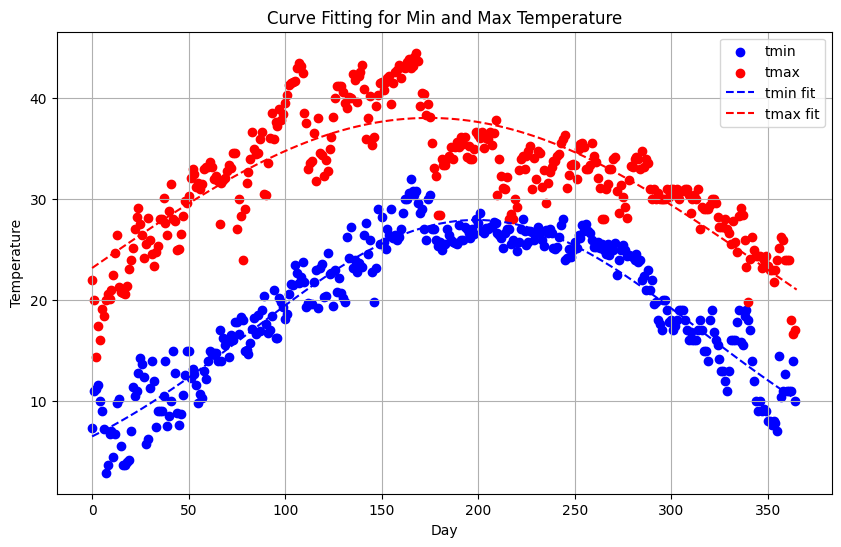

In [39]:
# We are using meteostat library to get the temperature data for Gaya, Bihar, India for the year 2023. Meteostat is a Python library designed for retrieving historical weather and climate data from the Meteostat project's database

from datetime import datetime
from meteostat import Point, Daily
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Set time period
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31)

# Create Point for Gaya, Bihar, India (my hometown)
gaya = Point(24.7914, 85.0002)

# Get daily data for 2023
data = Daily(gaya, start, end)
data = data.fetch()

selected_data = data[['tmin', 'tmax']]

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Fit Gaussian curve to tmin
popt_tmin, pcov_tmin = curve_fit(gaussian, np.arange(len(selected_data)), selected_data['tmin'], p0=[1, len(selected_data)/2, 1])

# Fit Gaussian curve to tmax
popt_tmax, pcov_tmax = curve_fit(gaussian, np.arange(len(selected_data)), selected_data['tmax'], p0=[1, len(selected_data)/2, 1])

# Generate x values for plotting
x = np.linspace(0, len(selected_data), 100)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(selected_data)), selected_data['tmin'], label='tmin', color='blue')
plt.scatter(np.arange(len(selected_data)), selected_data['tmax'], label='tmax', color='red')
plt.plot(x, gaussian(x, *popt_tmin), label='tmin fit', color='blue', linestyle='--')
plt.plot(x, gaussian(x, *popt_tmax), label='tmax fit', color='red', linestyle='--')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Curve Fitting for Min and Max Temperature')
plt.legend()
plt.grid(True)
plt.show()


**Data science in action: In a certain course taught by me, the performance of the students is as follows:
Sr.No: Student identifier, 
T1: Marks in Test 1,
T2: Marks in Test 2,
T3: Marks in Test 3,
T4: Marks in Test 4, 
G: Grade point**

| Sr. No. | T1 | T2 | T3 | T4 | G  |
|---------|----|----|----|----|----|
| 428     | 17 | 15 | 28 | 29 | 10 |
| 215     | 15 | 18 | 30 | 27 | 10 |
| 221     | 16 | 20 | 23 | 31 | 10 |
| 159     | 15 | 16 | 28 | 28 | 10 |
| 247     | 14 | 15 | 29 | 32 | 10 |
| 146     | 15 | 17 | 25 | 31 | 10 |
| 222     | 12 | 11 | 29 | 24 | 9  |
| 449     | 14 | 13 | 28 | 23 | 9  |
| 225     | 18 | 18 | 25 | 23 | 9  |
| 257     | 17 | 13 | 23 | 26 | 9  |
| 299     | 13 | 15 | 20 | 29 | 9  |
| 315     | 10 | 12 | 24 | 27 | 9  |
| 329     | 13 | 15 | 20 | 28 | 9  |
| 460     | 15 | 10 | 26 | 22 | 8  |
| 507     | 9  | 16 | 20 | 27 | 8  |
| 171     | 14 | 14 | 25 | 22 | 8  |
| 232     | 13 | 15 | 15 | 28 | 8  |
| 249     | 13 | 17 | 23 | 21 | 8  |
| 389     | 14 | 10 | 18 | 19 | 7  |
| 484     | 9  | 9  | 24 | 16 | 7  |
| 485     | 12 | 8  | 19 | 20 | 7  |
| 506     | 15 | 7  | 16 | 20 | 7  |
| 63      | 13 | 8  | 15 | 23 | 7  |
| 141     | 15 | 12 | 17 | 22 | 7  |
| 280     | 2  | 10 | 17 | 14 | 6  |
| 324     | 0  | 0  | 22 | 9  | 6  |
| 492     | 11 | 3  | 16 | 12 | 6  |
| 400     | 8  | 13 | 8  | 13 | 6  |
| 34      | 3  | 1  | 18 | 12 | 6  |

**Analysing the above data, recommend the grade points for the following students:**

| Sr. No. | T1 | T2 | T3 | T4 | G   |
|---------|----|----|----|----|-----|
| 127     | 10 | 7  | 15 | 20 | (?) |
| 365     | 13 | 15 | 25 | 18 | (?) |
| 210     | 18 | 18 | 28 | 27 | (?) |
| 34      | 3  | 1  | 18 | 12 | (?) |
| 210     | 18 | 18 | 28 | 27 | (?) |
| 34      | 3  | 1  | 18 | 12 | (?) |

In [17]:
import numpy as np
import pandas as pd

# Data provided
data = {
    'Sr. No.': [428, 215, 221, 159, 247, 146, 222, 449, 225, 257, 299, 315, 329, 460, 507, 171, 232, 249, 389, 484, 485, 506, 63, 141, 280, 324, 492, 400, 34],
    'T1': [17, 15, 16, 15, 14, 15, 12, 14, 18, 17, 13, 10, 13, 15, 9, 14, 13, 13, 14, 9, 12, 15, 13, 15, 2, 0, 11, 8, 3],
    'T2': [15, 18, 20, 16, 15, 17, 11, 13, 18, 13, 15, 12, 15, 10, 16, 14, 15,17, 10, 9, 8, 7, 8, 12, 10, 0, 3, 13, 1],
    'T3': [28, 30,	23,	28,	29,	25,	29,	28,	25,	23,	20,	24,	20,	26,	20,	25,	15,	23,	18,	24,	19,	16,	15,	17,	17,	22,	16, 8, 18],
    'T4': [29, 27, 31, 28, 32, 31, 24, 23, 23, 26, 29, 27,	28,	22,	27,	22,	28,	21,	19,	16,	20,	20,	23,	22,	14,	9, 12, 13, 12],
    'G': [10, 10, 10, 10, 10, 10, 9, 9,	9, 9, 9, 9,	9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7,	6, 6, 6, 6,	6]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Extract the test scores for SVD
X = df[['T1', 'T2', 'T3', 'T4']].values

# Perform SVD (singular value decomposition using inbuilt python function):
U, S, VT = np.linalg.svd(X)

# Reduce the dimension of system (to dimension k by truncating)
k = 3

# Dimensionality reduction
U_reduced = U[:, :k]
S_reduced = np.diag(S[:k])
VT_reduced = VT[:k, :]

# Recommend grade points for new students
new_students = [
    [10,  7, 15, 20],
    [13, 15, 25, 18],
    [18, 18, 28, 27],
    [ 3,  1, 18, 12],
    [18, 18, 28, 27],
    [ 3,  1, 18, 12]]

recommended_grades = []

for student_scores in new_students:
    # Project student scores onto the concept space
    student_concept = np.dot(student_scores, VT_reduced.T)
    
    # Reconstruct the projected scores back into the original space
    reconstructed_scores = np.dot(student_concept, VT_reduced)

    # mean squared error between the original and reconstructed scores
    mse = np.mean((student_scores - reconstructed_scores) ** 2)
    
    # Grade point recommendation based on the mean squared error
    recommended_grade = max(10 - int(mse), 0)  # Ensure grade does not go below 0
    recommended_grades.append(recommended_grade)

print("Recommended grade points for the new students:", recommended_grades)

Recommended grade points for the new students: [7, 2, 7, 8, 7, 8]
